In [49]:
import pandas as pd # Librairie pour gérer les tableaux de données et les formats étranges
import matplotlib.pyplot as plt
import numpy as np

## Travail en cours, non terminé.

In [42]:
df_mes_donnees = pd.read_csv('doublelooping.csv',sep=';') # Ici les données sont séparées par des ;, je le précise à python

In [43]:
df_mes_donnees=df_mes_donnees.apply(lambda x: x.str.replace(',','.'))  # Je remplace les , par des . pour 
df_mes_donnees = df_mes_donnees.astype(float) # les convertir en flottant.

In [44]:
df_mes_donnees.head()

,time,gFx,gFy,gFz,TgF
0,0.007,0.0307,-0.0043,0.9844,0.985
1,0.008,0.0302,-0.0023,0.9854,0.986
2,0.015,0.0302,-0.0028,0.9864,0.987
3,0.026,0.0321,-0.0028,0.9859,0.986
4,0.031,0.0297,-0.0038,0.9854,0.986


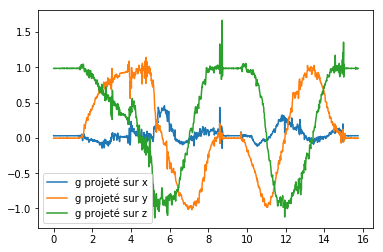

In [45]:
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFx'])
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFy'])
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFz'])
plt.legend(['g projeté sur x','g projeté sur y','g projeté sur z'])



#### En ordonnée on lit la projection de l'accélération de la pesanteur selon 3 directions x,y,z qui sont fixes dans le référentiel de mon téléphone. Si on lit (gx,gy,gz) = (1,0,0), celà indique que le vecteur x est aligné avec g et les autres sont orthogonaux.


#### Globalement j'ai essayé de faire faire un looping à mon téléphone dans un sens puis dans l'autre autour de l'axe x  qui n'est jamais orienté selon z. Regardons ça de plus près 

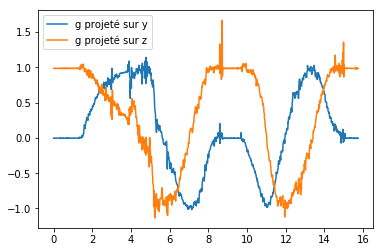

In [46]:
#plt.plot(df_mes_donnees['time'],df_mes_donnees['gFx'])
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFy'])
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFz'])
plt.legend(['g projeté sur y','g projeté sur z'])

#### Partons du principe que je n'ai pas trop secoué le téléphone et que je mesure donc que des projections de l'accélération de la pesanteur. On peut donc dire que les mesures sont dans [-1,1]. On va forcer cela

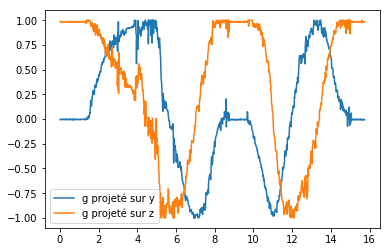

In [47]:
df_mes_donnees['gFy'][df_mes_donnees['gFy']>=1] = 1
df_mes_donnees['gFz'][df_mes_donnees['gFz']>=1] = 1

df_mes_donnees['gFy'][df_mes_donnees['gFy']<=-1] = -1
df_mes_donnees['gFz'][df_mes_donnees['gFz']<=-1] = -1

plt.plot(df_mes_donnees['time'],df_mes_donnees['gFy'])
plt.plot(df_mes_donnees['time'],df_mes_donnees['gFz'])
plt.legend(['g projeté sur y','g projeté sur z'])

#### Appelons $\theta$ l'angle (y,g), on a alors $1 = cos(\theta) y + sin(\theta) z$, en effet ici quand $\theta = 0$, on a z aligné avec y et quand $\theta = \pi /2$, on a bien z qui est aligné avec g. Notons $t = tan(\theta)$.On a :

#### $\frac{1}{cos( \theta ) } = y + t z $
#### $\sqrt{\frac{1}{cos^2( \theta ) }} = y + t z $
#### $\sqrt{t^2 +1 } = y + t z $   car $tan^2(\theta) + 1 = \frac{1}{cos^2(\theta)}$
#### $t^2 +1 = y^2 + 2 t z y + t^2 z^2$  
#### $ t^2 (1 - z^2) - 2 t z y + 1 - y^2 = 0$
#### On résout cette équation en t: $\Delta = 4( z^2 y^2 - (1-y^2)(1-z^2) )= 4 (z^2 + y^2 - 1) $
#### Par hypothèse de la modélisation, cette quantité vaut 0 
#### $t = zy$
#### $\theta = \arctan(zy)$

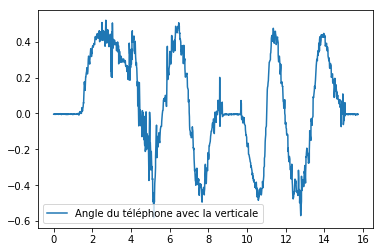

In [61]:
theta = np.arctan(df_mes_donnees['gFy']*df_mes_donnees['gFz'])
t = df_mes_donnees['time']
plt.plot(df_mes_donnees['time'],theta)
plt.legend(['Angle du téléphone avec la verticale'])

#### Et si je souhaite intégrer cette fonction ? 

In [71]:
int_0_t = [0]
for i in range(1,len(theta)):
    t_i = t[i]
    t_i_m1 = t[i-1]
    int_0_t += [int_0_t[i-1] + (t_i-t_i_m1)*theta[i]] # méthode des rectangle à droite, on peut changer
    # A noter que je n'ai pas supposé que la période d'échantillonage est constante, j'ai directement 
    # pris les instants donnés par la mesure et je calcule à la main le delta t . 
    

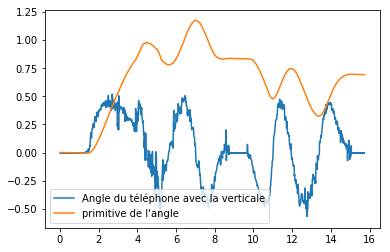

In [70]:

plt.plot(t,theta)
plt.plot(t,int_0_t)
plt.legend(['Angle du téléphone avec la verticale',"primitive de l'angle"])

In [110]:
# Traitement de données - cas où les instants de mesure sont au format timedate
df2 = pd.read_csv('experience_2.csv')


In [111]:
df2.head()

,time,ax,ay,az
0,2020-05-12 11:18:08.0450,0.01,-0.01,-0.02
1,2020-05-12 11:18:08.1370,-0.00,0.00,-0.01
2,2020-05-12 11:18:08.2370,-0.00,0.00,0.00
3,2020-05-12 11:18:08.3360,0.00,0.01,0.00
4,2020-05-12 11:18:08.4370,0.00,0.00,0.00


#### On voit que le format de date n'est pas sympathique. La librairie pandas permet de convertir sans peine ces données en ms.

In [112]:
df2['time'] = pd.to_datetime(df2['time'])
datetime
# Maintenant python comprend que c'est une date.

0       2020-05-12 11:18:08.045
1       2020-05-12 11:18:08.137
2       2020-05-12 11:18:08.237
3       2020-05-12 11:18:08.336
4       2020-05-12 11:18:08.437
                  ...          
10816   2020-05-12 11:36:01.077
10817   2020-05-12 11:36:01.177
10818   2020-05-12 11:36:01.275
10819   2020-05-12 11:36:01.375
10820   2020-05-12 11:36:01.474
Name: time, Length: 10821, dtype: datetime64[ns]

In [113]:
df2['time0']= df2['time'].min() # On crée une nouvelle colonne qui contient la date de départ de l'expérience
# On supprime cette colonne juste après
df2['elapsed time'] = (df2['time']- df2['time0']).dt.total_seconds() # On fait date de la mesure - date de début pour connaitre
# l'instant où les mesures sont faites
del df2['time0'],df2['time'] # On dégage les colonnes qui ne servent plus. 
 

In [114]:
df2.head()

,ax,ay,az,elapsed time
0,0.01,-0.01,-0.02,0.000
1,-0.00,0.00,-0.01,0.092
2,-0.00,0.00,0.00,0.192
3,0.00,0.01,0.00,0.291
4,0.00,0.00,0.00,0.392
